<a href="https://colab.research.google.com/github/CMDRZero/DataScienceFundamentalsClass/blob/main/Copy_of_Unit7ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fitting Curves: Concepts

What you'll do:

- Answer questions about what a GP is, and its relationship to GLMs and splines.
- Practice applying one of: polynomial modeling, b splines, or GPs
- You'll get a chance to read about and try to comprehend a more standard implementation of a GP.

Have fun!

**Task1**:

Why would you ever want to include a polynomial element in a model you built? What's the benefit of using polynomials to model?

Polynomials are better able to fit to data which may not have a linear relationship, which alot of data doesn't. Any function can be aproximated with a polynomial (taylor series), so a high enough polynomial will fit it well, but maybe over fit, so a low degree polynomial serves well generally if you have reason to believe the data might not be linear.

**Task2**:

Why would you ever NOT want to include a polynomial element in a model you built?

If we KNOW our data is linear, then any curving is something else and using a polynomial is wasting time, and potentially overfitting to trends we know arent truely present

**Task3**:

What's the point of using b splines?

B-splines let us break out graphs into smaller segments where we can easierly fit a polynomial, then we can smoothly blend between these polynomials to emulate the behavior of a very high polynomial, but without aggressive overfitting.

**Task4**:

Describe what a Gaussian Process is, in your own words. *Don't worry about being correct, just try to explain it to yourself*. I will not grade this question for accuracy.

A gaussian process is a model for representaing learnable functions by creating an infinitely large kernal representing the relationships between all of the points in a kernal (via a covarience matrix), and by updating that covarience matrix of priors with observations we can inform our prediction.

**Task5**:

Refit a model to the howell data, using one of the following: polynomial model, b splines, or GPs.
Plot the posterior predictive check on a scatter plot

You only need to use one . Remember, the simpler the model is, the better (usually).

Hint: If you use a polynomial or bspline, try a disdributional model


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az

In [ ]:
!pip install bambi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 4.5 MB/s eta 0:00:00


In [ ]:
import bambi as bmb

In [ ]:
frame = pd.read_csv("https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/howell.csv")

In [ ]:
num_knots = 6
knots = np.linspace(0, 60, num_knots+2)[1:-1]
model_spline = bmb.Model("height ~ bs(weight, degree=3, knots=knots)", frame, family="gaussian")
idata_spline = model_spline.fit()

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


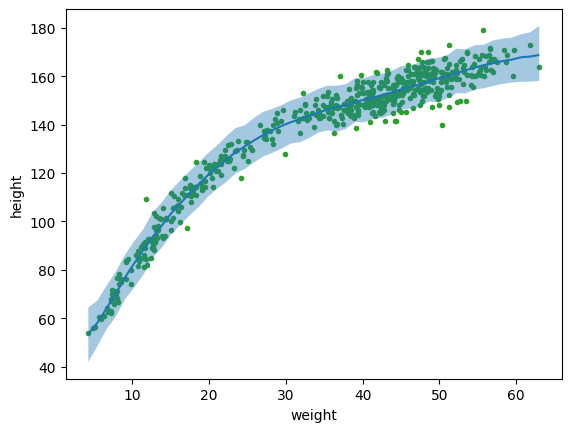

In [ ]:
bmb.interpret.plot_predictions(model_spline, idata_spline, "weight", pps= True)
plt.plot(frame.weight, frame.height, "C2.", zorder=-3)

In [ ]:
num_knots = 6
knots = np.linspace(0, 60, num_knots+2)[1:-1]
model_dis = bmb.Model(bmb.Formula("height ~ bs(weight, degree=3, knots=knots)", "sigma ~ weight"), frame)
idata_dis =  model_dis.fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


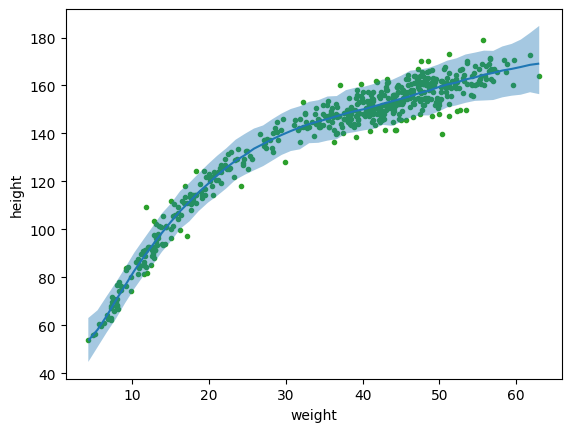

In [ ]:
bmb.interpret.plot_predictions(model_dis, idata_dis, "weight", pps= True)
plt.plot(frame.weight, frame.height, "C2.", zorder=-3)

**Task6**:

Read the article on the pymc website about GP implementation on the Mauna Loa CO$_{2}$ data combined with CO$_{2}$ ice core data from the south pole.
[Link here.](https://www.pymc.io/projects/examples/en/latest/gaussian_processes/GP-MaunaLoa2.html)

Write down one thing you learned about GPs from reading the article.

Note: You probably won't understand anything in this article. The main point of this task is to hammer home that good GP implementations are extremely technical.

 * I recognized the kernals, which is nice to see,  but it was pretty hard to follow the rules for building covarience matrixes.
 * I did learn that you can account for observation error with priors incorporating noise offsets to your observations.
 * Additionally, with GLPs, you have to specify things like a linear relationship trend or else it will tend back to zero. This is also true of our previous models, but with bambi it made it very easy to throw together a simple GLM which works well.

**Task7**:

Describe your favorite graph from the article in the previous task. Explain why its your favorite.

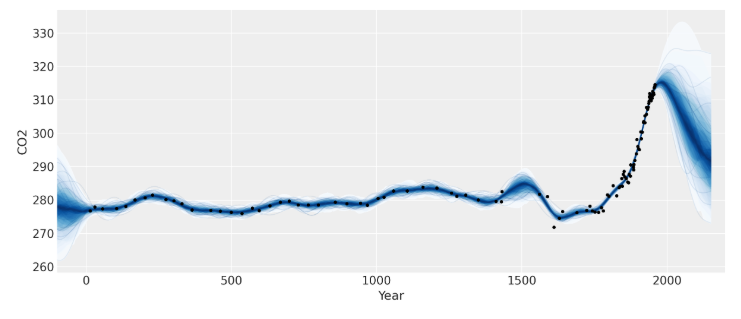

This one because its very pretty, but also because you can best of all clearlly see the error bands from running different samples. Importantly theres a wide margin of error around 1500, and the error for the future is very high as it could spike verynhigh or trend down very quick.

Its not the best predictor, but it does look very pretty